<a href="https://colab.research.google.com/github/jatinarora-01/Tesla-Stock-Price-Prediction-Model/blob/main/Tesla_stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Importing all required libraries
2. Importing the Yahoo Finance dataset
3. Utilizing Plotly express for data visualisation
4. Preparing Data for Modeling
5. Creating Facebook Prophet Model
6. Forecasting Stocks data for next 30 days
7. Downlaoding the predicted data

# Importing all required libraries

In [ ]:
# Necessary libraries: pandas, prophet, plotly
import pandas as pd
import plotly.express as px
from prophet import Prophet

In [ ]:
# Initializing Plotly
import plotly.io as pio
pio.renderers.deafult='colab'

# Data Gathering

In [ ]:
stock_data_df= pd.read_csv('/content/TSLA.csv')

In [ ]:
stock_data_df['Date'] = pd.to_datetime(stock_data_df['Date'])
start_date = '2020-01-01'
end_date = '2021-01-01'
filtered_data = stock_data_df[(stock_data_df['Date'] >= start_date) & (stock_data_df['Date'] <= end_date)]
print(filtered_data)

           Date        Open        High         Low       Close   Adj Close  \
2392 2020-01-02   84.900002   86.139999   84.342003   86.052002   86.052002   
2393 2020-01-03   88.099998   90.800003   87.384003   88.601997   88.601997   
2394 2020-01-06   88.094002   90.311996   88.000000   90.307999   90.307999   
2395 2020-01-07   92.279999   94.325996   90.671997   93.811996   93.811996   
2396 2020-01-08   94.739998   99.697998   93.646004   98.428001   98.428001   
...         ...         ...         ...         ...         ...         ...   
2640 2020-12-24  642.989990  666.090027  641.000000  661.770020  661.770020   
2641 2020-12-28  674.510010  681.400024  660.799988  663.690002  663.690002   
2642 2020-12-29  661.000000  669.900024  655.000000  665.989990  665.989990   
2643 2020-12-30  672.000000  696.599976  668.359985  694.780029  694.780029   
2644 2020-12-31  699.989990  718.719971  691.119995  705.669983  705.669983   

         Volume  
2392   47660500  
2393   88892500

In [ ]:
# Save the filtered data to a new CSV file (optional)
filtered_data.to_csv('filtered_stock_data_2020.csv', index=False)

In [ ]:
stock_data_df=pd.read_csv('filtered_stock_data_2020.csv')

In [ ]:
stock_data_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,84.900002,86.139999,84.342003,86.052002,86.052002,47660500
1,2020-01-03,88.099998,90.800003,87.384003,88.601997,88.601997,88892500
2,2020-01-06,88.094002,90.311996,88.000000,90.307999,90.307999,50665000
3,2020-01-07,92.279999,94.325996,90.671997,93.811996,93.811996,89410500
4,2020-01-08,94.739998,99.697998,93.646004,98.428001,98.428001,155721500
...,...,...,...,...,...,...,...
248,2020-12-24,642.989990,666.090027,641.000000,661.770020,661.770020,22865600
249,2020-12-28,674.510010,681.400024,660.799988,663.690002,663.690002,32278600
250,2020-12-29,661.000000,669.900024,655.000000,665.989990,665.989990,22910800
251,2020-12-30,672.000000,696.599976,668.359985,694.780029,694.780029,42846000


In [ ]:
stock_data_df['Date'].min()

'2020-01-02'

In [ ]:
stock_data_df['Date'].max()

'2020-12-31'

In [ ]:
stock_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       253 non-null    object 
 1   Open       253 non-null    float64
 2   High       253 non-null    float64
 3   Low        253 non-null    float64
 4   Close      253 non-null    float64
 5   Adj Close  253 non-null    float64
 6   Volume     253 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.0+ KB


In [ ]:
stock_data_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,289.108428,297.288412,280.697937,289.997067,289.997067,7.530795e+07
std,167.665389,171.702889,163.350196,168.995613,168.995613,4.013706e+07
min,74.940002,80.972000,70.101997,72.244003,72.244003,1.735770e+07
25%,148.367996,154.990005,143.222000,149.792007,149.792007,4.713450e+07
50%,244.296005,245.600006,237.119995,241.731995,241.731995,7.025550e+07
75%,421.390015,430.500000,410.579987,421.200012,421.200012,9.454550e+07
max,699.989990,718.719971,691.119995,705.669983,705.669983,3.046940e+08


# Data Visualization using plotly express

In [ ]:
px.area(stock_data_df, x='Date', y='Close') # Here, 'Close' denotes the price of the stocks

In [ ]:
px.line(stock_data_df, x='Date', y='Close')

In [ ]:

# This is the daily transactional volumne of data
px.area(stock_data_df, x='Date', y='Volume')

In [ ]:
px.bar(stock_data_df, y='Volume', color_discrete_sequence=['red'])

In [ ]:
# To analyze statistical data ( We dont need to specify x axis everytime)
px.box(stock_data_df, y='Close')

# Data preparation

In [ ]:
stock_data_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,84.900002,86.139999,84.342003,86.052002,86.052002,47660500
1,2020-01-03,88.099998,90.800003,87.384003,88.601997,88.601997,88892500
2,2020-01-06,88.094002,90.311996,88.000000,90.307999,90.307999,50665000
3,2020-01-07,92.279999,94.325996,90.671997,93.811996,93.811996,89410500
4,2020-01-08,94.739998,99.697998,93.646004,98.428001,98.428001,155721500
...,...,...,...,...,...,...,...
248,2020-12-24,642.989990,666.090027,641.000000,661.770020,661.770020,22865600
249,2020-12-28,674.510010,681.400024,660.799988,663.690002,663.690002,32278600
250,2020-12-29,661.000000,669.900024,655.000000,665.989990,665.989990,22910800
251,2020-12-30,672.000000,696.599976,668.359985,694.780029,694.780029,42846000


In [ ]:
# Creating new df with date and price column (Close is the Price and it is y , whereas, x is date)
columns= ['Date', 'Close']
new_stock_data_df= pd.DataFrame(stock_data_df, columns=columns)
new_stock_data_df

,Date,Close
0,2020-01-02,86.052002
1,2020-01-03,88.601997
2,2020-01-06,90.307999
3,2020-01-07,93.811996
4,2020-01-08,98.428001
...,...,...
248,2020-12-24,661.770020
249,2020-12-28,663.690002
250,2020-12-29,665.989990
251,2020-12-30,694.780029


In [ ]:
# Renaming dataframe columns as per the requirement of Facebook Prophet model
prophet_df = new_stock_data_df.rename(columns={'Date': 'ds', 'Close':'y'})
prophet_df

,ds,y
0,2020-01-02,86.052002
1,2020-01-03,88.601997
2,2020-01-06,90.307999
3,2020-01-07,93.811996
4,2020-01-08,98.428001
...,...,...
248,2020-12-24,661.770020
249,2020-12-28,663.690002
250,2020-12-29,665.989990
251,2020-12-30,694.780029


# Creating Facebook Prophet Model

In [ ]:
# Initializing and fitting prophet model
model = Prophet()
model.fit(prophet_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprbc9u5yn/jh6_v2pm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprbc9u5yn/wpdf7j56.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51324', 'data', 'file=/tmp/tmprbc9u5yn/jh6_v2pm.json', 'init=/tmp/tmprbc9u5yn/wpdf7j56.json', 'output', 'file=/tmp/tmprbc9u5yn/prophet_modeloww39gwn/prophet_model-20250111135923.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:59:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:59:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


# Model Prediction and Forecasting

In [ ]:
# Here model will forecast for 1 month
future_data_prediction= model.make_future_dataframe(periods= 30)
forecast=model.predict(future_data_prediction)

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-02,106.446083,63.668046,156.021517,106.446083,106.446083,4.724785,4.724785,4.724785,4.724785,4.724785,4.724785,0.0,0.0,0.0,111.170868
1,2020-01-03,106.687911,62.659325,154.544801,106.687911,106.687911,2.187236,2.187236,2.187236,2.187236,2.187236,2.187236,0.0,0.0,0.0,108.875146
2,2020-01-06,107.413394,66.390413,160.904443,107.413394,107.413394,4.480698,4.480698,4.480698,4.480698,4.480698,4.480698,0.0,0.0,0.0,111.894092
3,2020-01-07,107.655221,62.031989,159.743723,107.655221,107.655221,4.564476,4.564476,4.564476,4.564476,4.564476,4.564476,0.0,0.0,0.0,112.219697
4,2020-01-08,107.897049,63.536848,161.807590,107.897049,107.897049,4.626444,4.626444,4.626444,4.626444,4.626444,4.626444,0.0,0.0,0.0,112.523493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,2021-01-26,709.899880,663.690708,763.498505,706.066525,713.796943,4.564476,4.564476,4.564476,4.564476,4.564476,4.564476,0.0,0.0,0.0,714.464355
279,2021-01-27,712.578524,671.682319,765.731664,708.411752,716.744535,4.626444,4.626444,4.626444,4.626444,4.626444,4.626444,0.0,0.0,0.0,717.204968
280,2021-01-28,715.257168,672.139294,768.200639,710.776357,719.685577,4.724785,4.724785,4.724785,4.724785,4.724785,4.724785,0.0,0.0,0.0,719.981953
281,2021-01-29,717.935813,670.347764,768.542311,713.277877,722.565711,2.187236,2.187236,2.187236,2.187236,2.187236,2.187236,0.0,0.0,0.0,720.123048


In [ ]:
px.line(forecast, x='ds', y='yhat')

In [ ]:
import pandas as pd
import plotly.express as px

stock_data = pd.read_csv('/content/TSLA.csv')
forecast = pd.read_csv('/content/TESLA_stock_forecast.csv')

# Date columns to datetime format
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
forecast['ds'] = pd.to_datetime(forecast['ds'])

# Set the Date column as the index for easier filtering
stock_data.set_index('Date', inplace=True)

# Filter stock price data for the range 1-1-2020 to 1-1-2021 + 30 days using .loc
filtered_stock_data = stock_data.loc['2020-01-01':'2021-01-31'].reset_index()

filtered_stock_data['Type'] = 'Actual'
forecast['Type'] = 'Predicted'

filtered_stock_data = filtered_stock_data.rename(columns={'Date': 'ds', 'Close': 'y'})
forecast = forecast.rename(columns={'yhat': 'y'})

# Combined both datasets for plotting
combined_data = pd.concat([filtered_stock_data[['ds', 'y', 'Type']], forecast[['ds', 'y', 'Type']]])

# Combined data using plotly.express
fig = px.line(combined_data, x='ds', y='y', color='Type', title='Stock Price vs Forecast')
fig.update_layout(xaxis_title='Date', yaxis_title='Stock Price')
fig.show()

<ipython-input-28-f98b131cf463>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



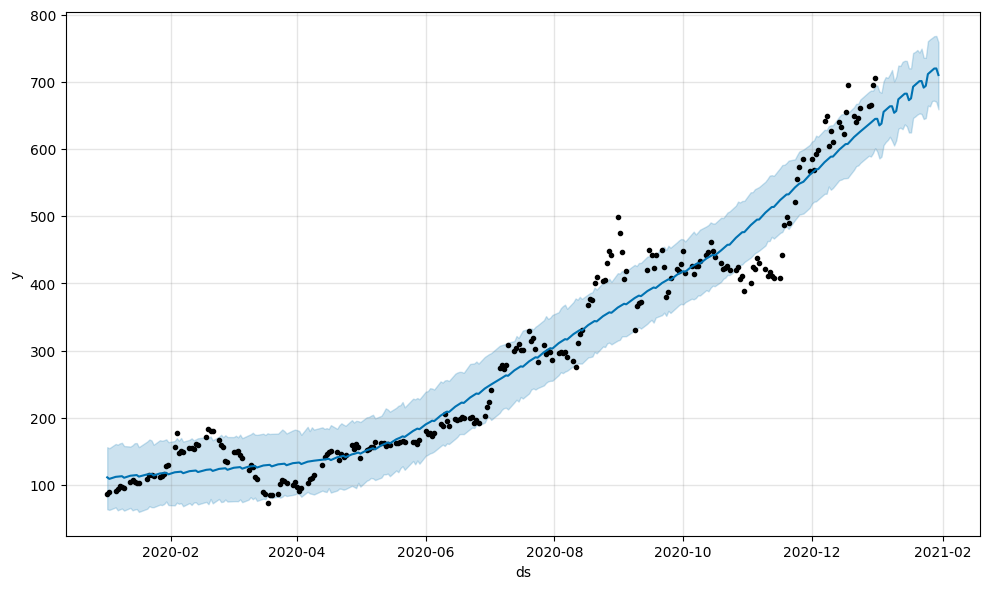

In [ ]:
figure=model.plot(forecast,xlabel='ds', ylabel='y')
# Here black dots is the actual price of tesla and blue is the forecasted price

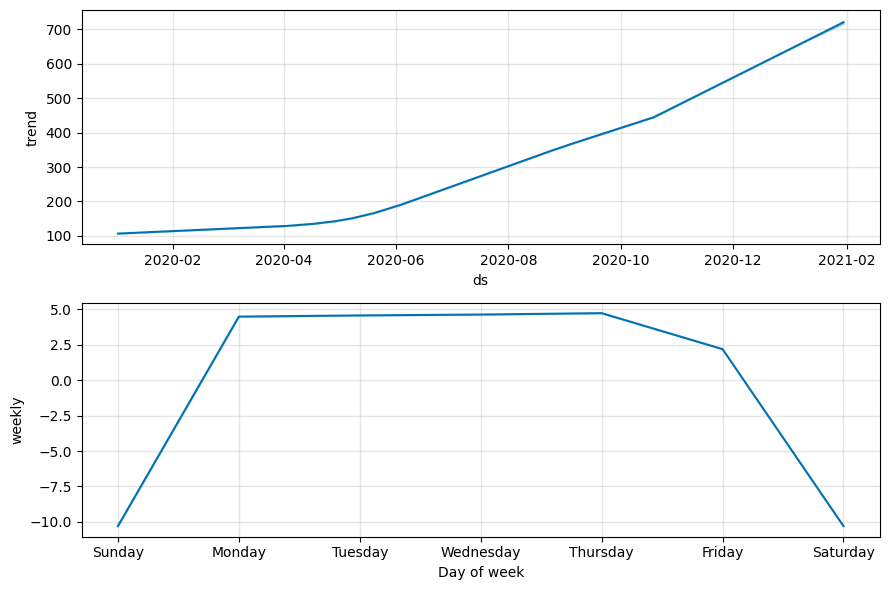

In [ ]:
# Plotting weekly trend and overall trend
figure2=model.plot_components(forecast)

# Downloading the Forecast data

In [ ]:
# To download the forecasted file directly
from google.colab import files
forecast.to_csv("TESLA_stock_forecast.csv")
files.download('TESLA_stock_forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>